In [67]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


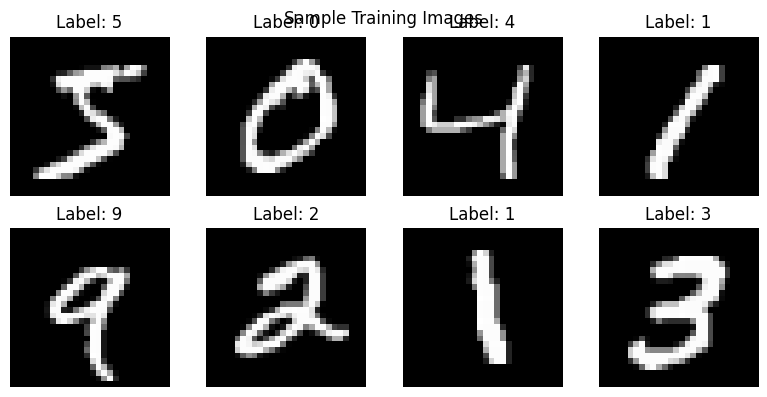

In [72]:
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.suptitle("Sample Training Images")
plt.show()


In [73]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 digits (0–9)
])

model.summary()


C:\Users\megha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test, y_test))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.8591 - loss: 0.4792 - val_accuracy: 0.9845 - val_loss: 0.0524
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9809 - loss: 0.0607 - val_accuracy: 0.9865 - val_loss: 0.0439
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9885 - val_loss: 0.0364
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9901 - loss: 0.0286 - val_accuracy: 0.9901 - val_loss: 0.0333
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9902 - val_loss: 0.0277


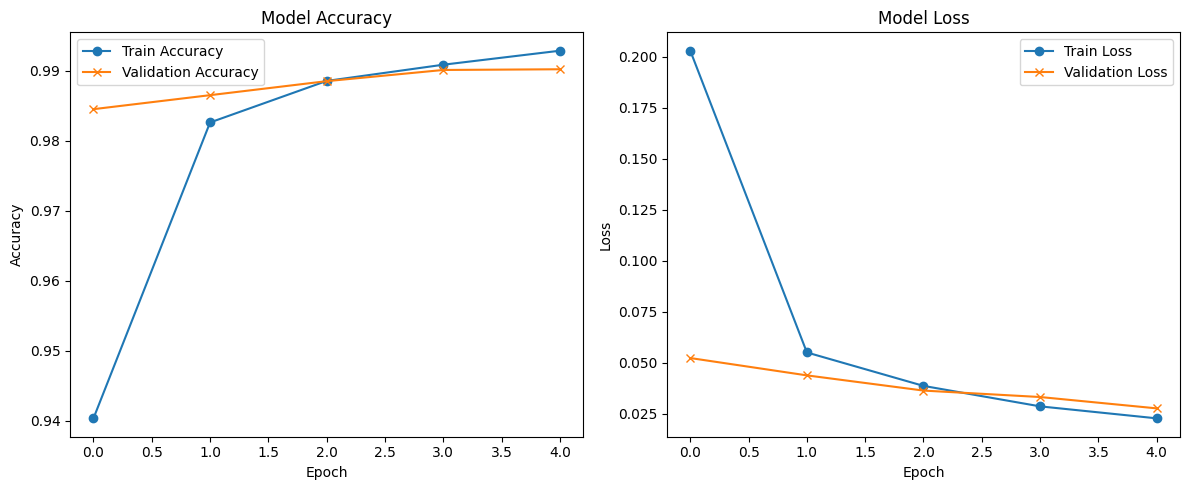

In [75]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9902
Test Loss: 0.0277


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


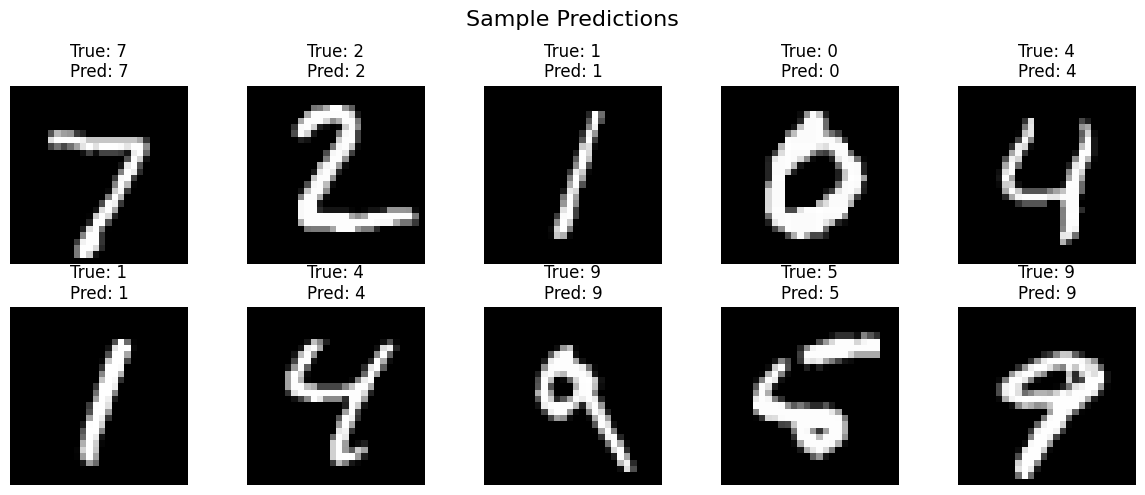

In [77]:
# Predict on test set
predictions = model.predict(x_test)

# Visualize predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}\nPred: {np.argmax(predictions[i])}")
    plt.axis("off")

plt.suptitle("Sample Predictions", fontsize=16)
plt.tight_layout()
plt.show()


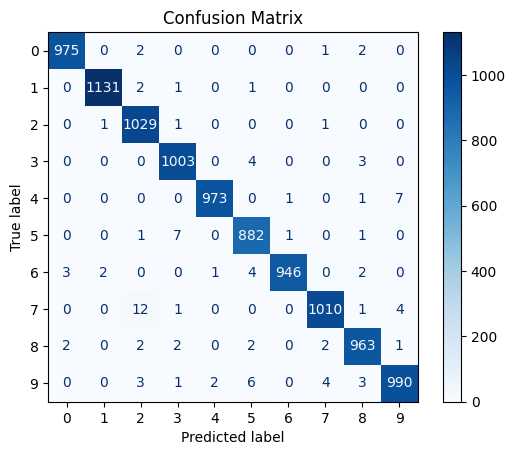

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [80]:
model.save("digit_model.h5")
print("Model saved as digit_model.h5")


Model saved as digit_model.h5
